# 1. Import Necessary Libraries

In [46]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import logging
import matplotlib.pyplot as plt
import gc
import numpy as np

RELATIVE_FEATURES_DIR = '../data/features'
LANGUAGES = [
    'es',
    'hi'
]



# 2. Tests

In [47]:
# Initialize an empty list to collect data for each language
summary_data = []

# Loop through each language
for language in LANGUAGES:
    # Check if the file exists
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    
    if not file_path.exists():
        print(f"File {language}_features.csv does not exist. Please run the feature extraction script first.")
        continue

    # Load the CSV file into a DataFrame
    df_features = pd.read_csv(file_path)

    # Collect relevant information
    num_rows = len(df_features)

    # Gender distribution based on prefixes
    male_count = df_features['gender'].str.startswith('male').sum()
    female_count = df_features['gender'].str.startswith('female').sum()

    # Age classification: count 'teens' (13-19) or 'adults' (20+)
    df_features['age_group'] = df_features['age'].apply(
        lambda x: 'teens' if 'teens' in str(x).lower() else 'adults'
    )

    # Count teens and adults
    age_group_counts = df_features['age_group'].value_counts().to_dict()
    teens_count = age_group_counts.get('teens', 0)
    adults_count = age_group_counts.get('adults', 0)

    # Add the summary information to the list
    summary_data.append([
        language, num_rows, male_count, female_count, teens_count, adults_count
    ])

# Define the column names
columns = ['Language', 'Num_Rows', 'Gender_male', 'Gender_female', 'Teens', 'Adults']

# Create the DataFrame with specified columns
summary_df = pd.DataFrame(summary_data, columns=columns)

# Display the summary DataFrame
print(summary_df)


  Language  Num_Rows  Gender_male  Gender_female  Teens  Adults
0       es    214698       156439          57130   8634  206064
1       hi      7484         7053            431    129    7355


# 3. EXploration steps

## 3.1 Pitch

### 3.1.1 Pitch per language

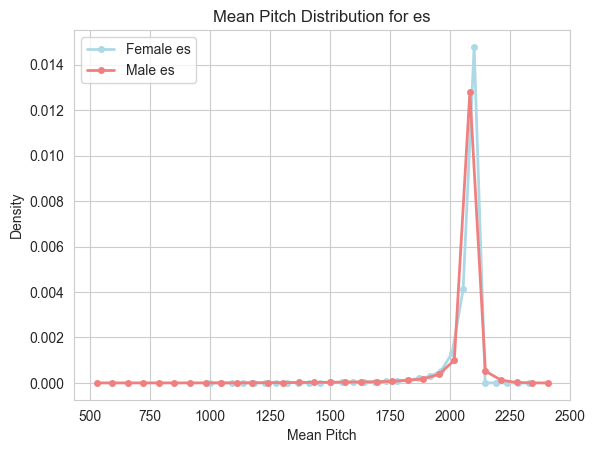

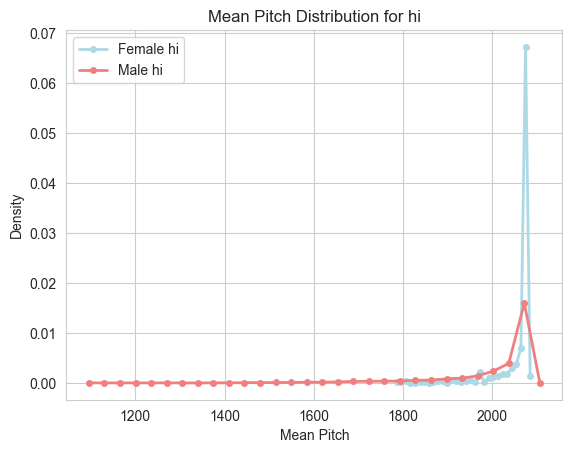

In [48]:
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # Filter females and males from df_features based on gender prefix
    df_female = df_features[df_features['gender'].str.startswith('female')]
    df_male = df_features[df_features['gender'].str.startswith('male')]

    # Set seaborn style
    sns.set_style('whitegrid')

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create a histogram for females (get the counts and bin edges)
    female_counts, female_bins = np.histogram(df_female['pitch_mean'], bins=bins, density=True)
    
    # Create a histogram for males (get the counts and bin edges)
    male_counts, male_bins = np.histogram(df_male['pitch_mean'], bins=bins, density=True)

    # Calculate the bin centers for plotting
    female_bin_centers = 0.5 * (female_bins[1:] + female_bins[:-1])
    male_bin_centers = 0.5 * (male_bins[1:] + male_bins[:-1])

    # Plot the lines for females and males
    plt.plot(female_bin_centers, female_counts, label=f'Female {language}', color='lightblue', linewidth=2, marker='o', markersize=4)
    plt.plot(male_bin_centers, male_counts, label=f'Male {language}', color='lightcoral', linewidth=2, marker='o', markersize=4)

    # Set the title and legend
    plt.title(f'Mean Pitch Distribution for {language}')
    plt.xlabel('Mean Pitch')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

### 3.1.2 Pitcha across all languages

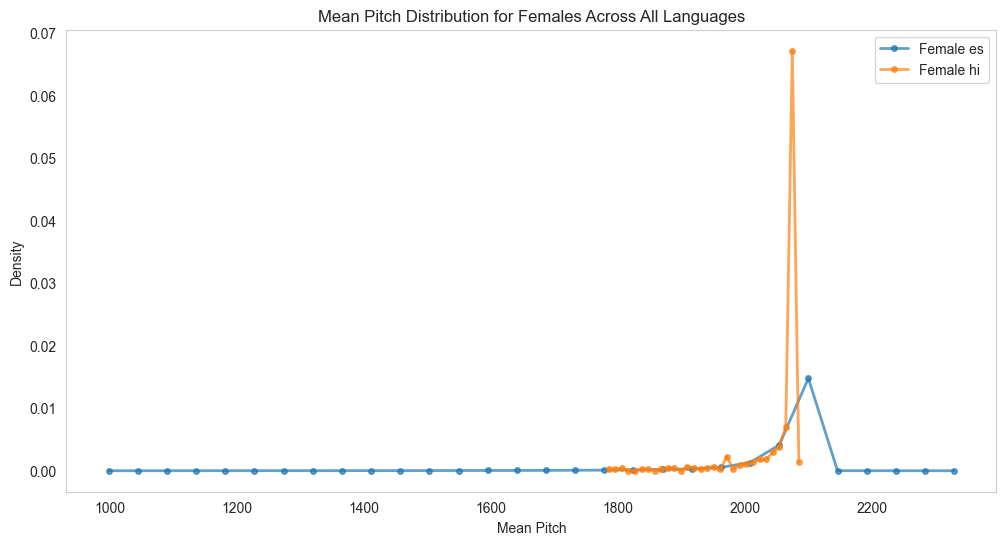

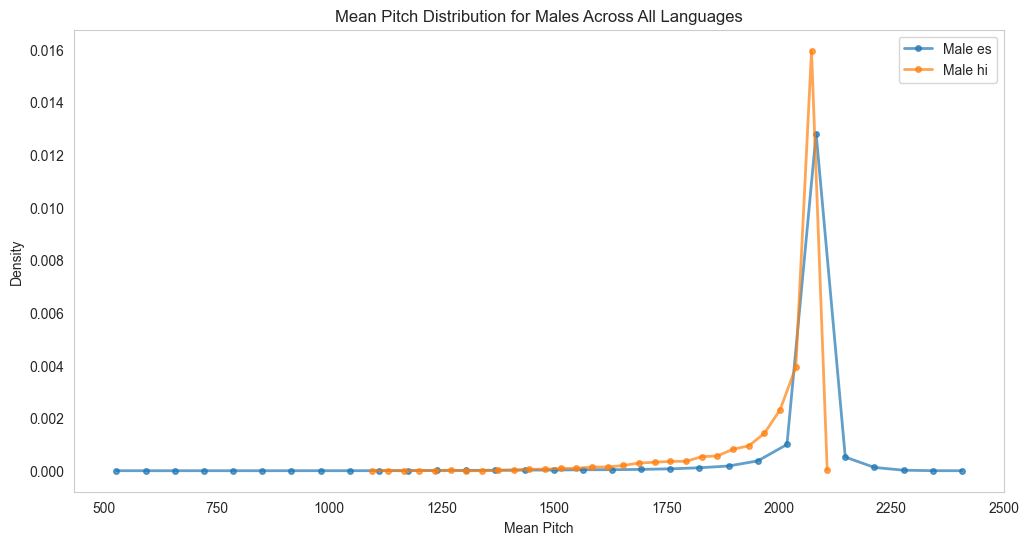

In [49]:
# Set up the figure for females
plt.figure(figsize=(12, 6))
plt.title('Mean Pitch Distribution for Females Across All Languages')
plt.xlabel('Mean Pitch')
plt.ylabel('Density')
sns.set_style('whitegrid')

for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # Filter females from df_features based on gender prefix
    df_female = df_features[df_features['gender'].str.startswith('female')]

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create histograms for females (get the counts and bin edges)
    female_counts, female_bins = np.histogram(df_female['pitch_mean'], bins=bins, density=True)
    female_bin_centers = 0.5 * (female_bins[1:] + female_bins[:-1])

    # Plot the lines for females
    plt.plot(female_bin_centers, female_counts, label=f'Female {language}', linewidth=2, marker='o', alpha=0.7, markersize=4)

# Finalize female plot
plt.legend()
plt.grid()
plt.show()

# Set up the figure for males
plt.figure(figsize=(12, 6))
plt.title('Mean Pitch Distribution for Males Across All Languages')
plt.xlabel('Mean Pitch')
plt.ylabel('Density')
sns.set_style('whitegrid')

# Loop again for males
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # Filter males from df_features based on gender prefix
    df_male = df_features[df_features['gender'].str.startswith('male')]

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create histograms for males (get the counts and bin edges)
    male_counts, male_bins = np.histogram(df_male['pitch_mean'], bins=bins, density=True)
    male_bin_centers = 0.5 * (male_bins[1:] + male_bins[:-1])

    # Plot the lines for males
    plt.plot(male_bin_centers, male_counts, label=f'Male {language}', linewidth=2, marker='o', alpha=0.7, markersize=4)

# Finalize male plot
plt.legend()
plt.grid()
plt.show()

## 3.2 Spectral Centroid

### 3.2.1 Spectral Centroid per language

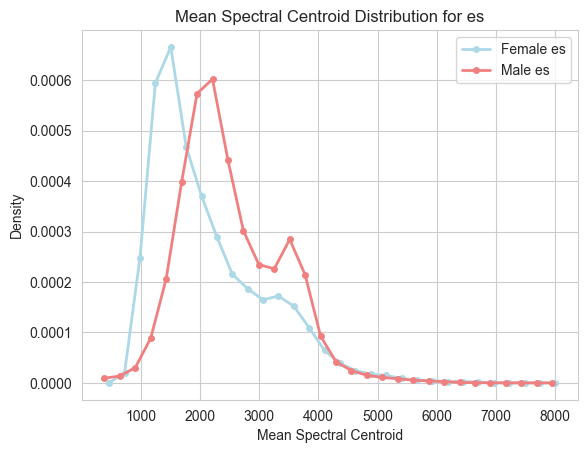

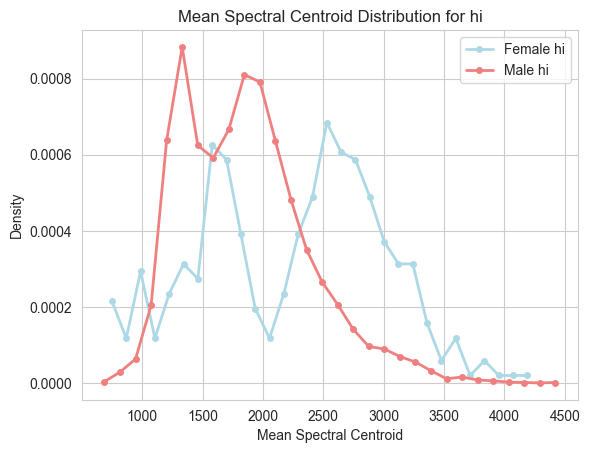

In [50]:
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # Filter females and males from df_features based on gender prefix
    df_female = df_features[df_features['gender'].str.startswith('female')]
    df_male = df_features[df_features['gender'].str.startswith('male')]

    # Set seaborn style
    sns.set_style('whitegrid')

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create a histogram for females (get the counts and bin edges)
    female_counts, female_bins = np.histogram(df_female['spectral_centroid_mean'], bins=bins, density=True)
    
    # Create a histogram for males (get the counts and bin edges)
    male_counts, male_bins = np.histogram(df_male['spectral_centroid_mean'], bins=bins, density=True)

    # Calculate the bin centers for plotting
    female_bin_centers = 0.5 * (female_bins[1:] + female_bins[:-1])
    male_bin_centers = 0.5 * (male_bins[1:] + male_bins[:-1])

    # Plot the lines for females and males
    plt.plot(female_bin_centers, female_counts, label=f'Female {language}', color='lightblue', linewidth=2, marker='o', markersize=4)
    plt.plot(male_bin_centers, male_counts, label=f'Male {language}', color='lightcoral', linewidth=2, marker='o', markersize=4)

    # Set the title and legend
    plt.title(f'Mean Spectral Centroid Distribution for {language}')
    plt.xlabel('Mean Spectral Centroid')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

### 3.2.2 Spectral Centroid Across All Languages

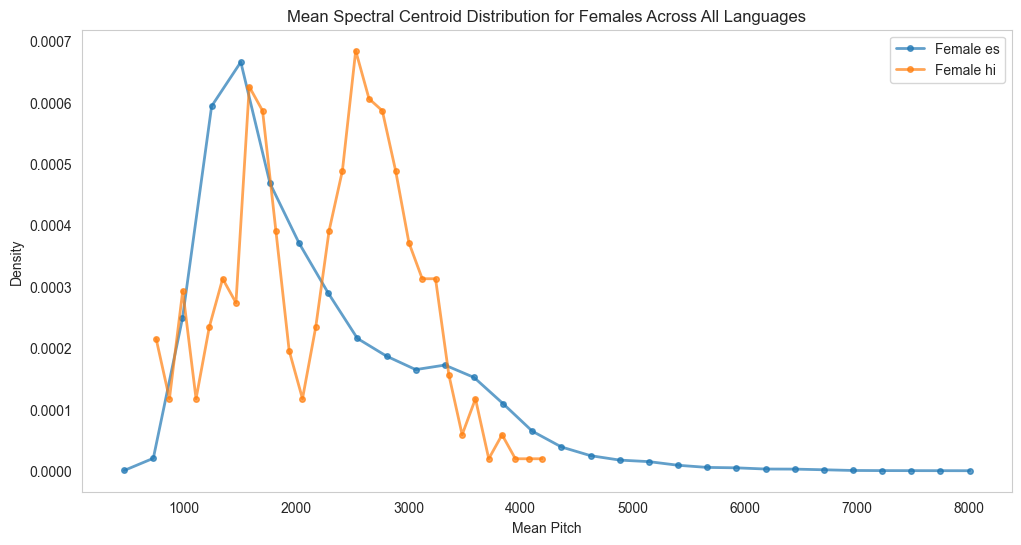

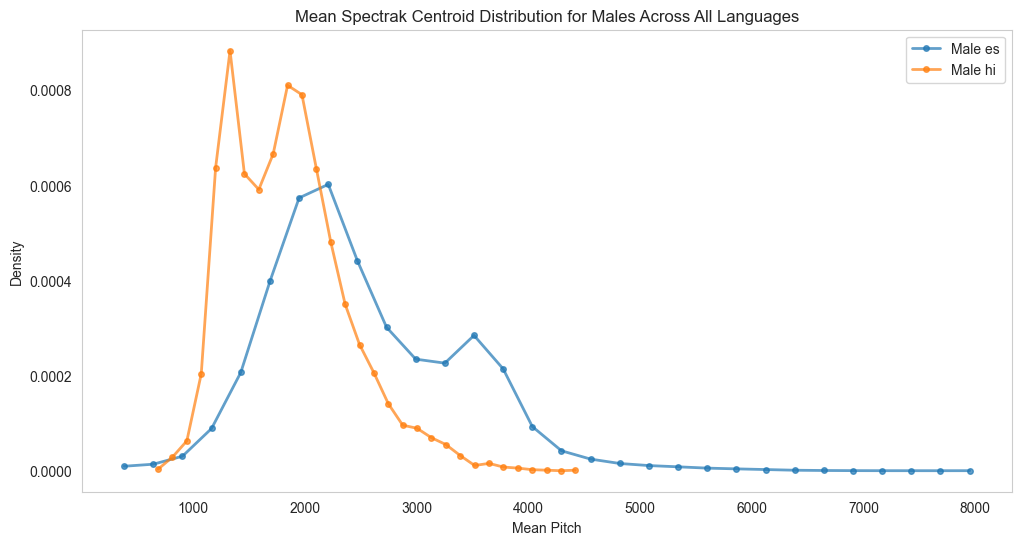

In [51]:
# Set up the figure for females
plt.figure(figsize=(12, 6))
plt.title('Mean Spectral Centroid Distribution for Females Across All Languages')
plt.xlabel('Mean Pitch')
plt.ylabel('Density')
sns.set_style('whitegrid')

for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # Filter females from df_features based on gender prefix
    df_female = df_features[df_features['gender'].str.startswith('female')]

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create histograms for females (get the counts and bin edges)
    female_counts, female_bins = np.histogram(df_female['spectral_centroid_mean'], bins=bins, density=True)
    female_bin_centers = 0.5 * (female_bins[1:] + female_bins[:-1])

    # Plot the lines for females
    plt.plot(female_bin_centers, female_counts, label=f'Female {language}', linewidth=2, marker='o', alpha=0.7, markersize=4)

# Finalize female plot
plt.legend()
plt.grid()
plt.show()

# Set up the figure for males
plt.figure(figsize=(12, 6))
plt.title('Mean Spectrak Centroid Distribution for Males Across All Languages')
plt.xlabel('Mean Pitch')
plt.ylabel('Density')
sns.set_style('whitegrid')

# Loop again for males
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # Filter males from df_features based on gender prefix
    df_male = df_features[df_features['gender'].str.startswith('male')]

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create histograms for males (get the counts and bin edges)
    male_counts, male_bins = np.histogram(df_male['spectral_centroid_mean'], bins=bins, density=True)
    male_bin_centers = 0.5 * (male_bins[1:] + male_bins[:-1])

    # Plot the lines for males
    plt.plot(male_bin_centers, male_counts, label=f'Male {language}', linewidth=2, marker='o', alpha=0.7, markersize=4)

# Finalize male plot
plt.legend()
plt.grid()
plt.show()